In [1]:
from matplotlib.pyplot import imshow, draw, pause
import matplotlib.pyplot as plt
from matplotlib import animation
import h5py
import argparse
import numpy as np
import os

class AnimatedGif:
    def __init__(self, size=(800, 600)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []

    def add(self, image, label=''):
        plt_im = plt.imshow(image, cmap='coolwarm', animated=True)
        plt_txt = plt.text(10, 10, label, color='red')
        self.images.append([plt_im, plt_txt])

    def save(self, filename, fps):
        ani = animation.ArtistAnimation(self.fig, self.images)
        ani.save(filename, writer='imagemagick', fps=fps)

In [102]:
List = os.listdir()
list = []
for l in List:
    if l[:5]=='slurm':
        list.append(l)
data = []
for i in range(len(list)):
    t=[]
    try: 
        t = np.loadtxt(list[i])
    except:
        continue
    if len(t):
        data.append(t)
D = np.array(data)
###np.savetxt('bench_data.txt',D)

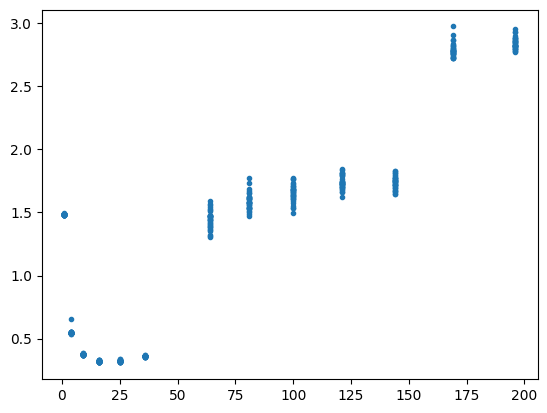

In [107]:
plt.plot(D[:,1][(D[:,-1]==0)],D[:,-2][(D[:,-1]==0)],'.')

(3928, 7200)
0 (436, 450) 450 0 436 0 0 196200 28085400
1 (436, 450) 900 450 436 0 196200 392400 27889200
2 (436, 450) 1350 900 436 0 392400 588600 27693000
3 (436, 450) 1800 1350 436 0 588600 784800 27496800
4 (436, 450) 2250 1800 436 0 784800 981000 27300600
5 (436, 450) 2700 2250 436 0 981000 1177200 27104400
6 (436, 450) 3150 2700 436 0 1177200 1373400 26908200
7 (436, 450) 3600 3150 436 0 1373400 1569600 26712000
8 (436, 450) 4050 3600 436 0 1569600 1765800 26515800
9 (436, 450) 4500 4050 436 0 1765800 1962000 26319600
10 (436, 450) 4950 4500 436 0 1962000 2158200 26123400
11 (436, 450) 5400 4950 436 0 2158200 2354400 25927200
12 (436, 450) 5850 5400 436 0 2354400 2550600 25731000
13 (436, 450) 6300 5850 436 0 2550600 2746800 25534800
14 (436, 450) 6750 6300 436 0 2746800 2943000 25338600
15 (436, 450) 7200 6750 436 0 2943000 3139200 25142400
16 (436, 450) 450 0 872 436 3139200 3335400 24946200
17 (436, 450) 900 450 872 436 3335400 3531600 24750000
18 (436, 450) 1350 900 872 436 3

MovieWriter imagemagick unavailable; using Pillow instead.


(3928, 7200)


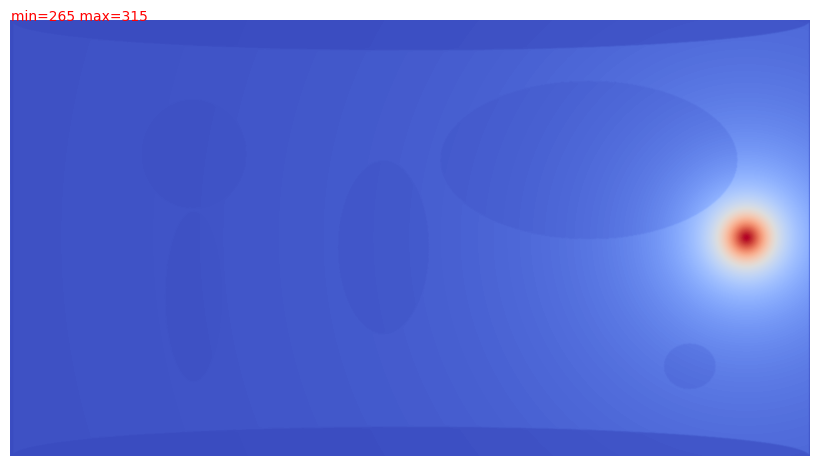

In [2]:
input_hdf5_file = 'out144L.hdf5'
output_video_file = 'par144L.gif'
fps = 10
# Number of ranks in rach dimension
nx,ny = 16,9

# dimensions of world.
Nx,Ny = 7200,3928#360,196

iter = 0
with h5py.File(input_hdf5_file, 'r') as f:
    video = AnimatedGif()
    for frame_id in sorted([int(k) for k in f.keys()]):
        Frame = np.array(f[str(frame_id)]['/%d/world' % frame_id])
        frame = np.zeros_like(Frame)
        flat = Frame.flatten()
        fstart = 0
        fend = 0
        c=0
        for j in range(ny):
            for i in range(nx):
                
                ib = int(Nx * (i)/nx)
                ie = int(Nx *(i+1)/nx)
                isize = ie-ib
                jb = int(Ny * (j)/ny)
                je = int(Ny *(j+1)/ny)
                jsize = je-jb
                fstart = 0+fend
                fend += jsize*isize
                #print(fstart,fend,fend-fstart)
                ftemp = np.reshape(flat[fstart:fend],(jsize,isize))
                if iter==0:
                    print(c,ftemp.shape,ie,ib,je,jb, fstart,fend,Nx*Ny-fend)
                frame[jb:je,ib:ie] = ftemp
                c+=1
        iter += 1
        label = "min="+str(int(frame.min()))+" max="+str(int(frame.max()))
        video.add(frame, label=label)
    video.save(output_video_file, fps)

In [5]:
with h5py.File(input_hdf5_file, 'r') as f:
    for frame_id in range(1):
        frame = np.array(f[str(frame_id)]['/%d/world' % frame_id])
frame.

293.47426060367314